# The Real Problem

Recognizing multi-digit numbers in photographs captured at street level is an important
component of modern-day map making. A classic example of a corpus of such street
level photographs is Google’s Street View imagery comprised of hundreds of millions of
geo-located 360 degree panoramic images. The ability to automatically transcribe an
address number from a geo-located patch of pixels and associate the transcribed
number with a known street address helps pinpoint, with a high degree of accuracy, the
location of the building it represents.
More broadly, recognizing numbers in photographs is a problem of interest to the optical
character recognition community. While OCR on constrained domains like document
processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual
appearance of text in the wild on account of a large range of fonts, colors, styles,
orientations, and character arrangements. The recognition problem is further
complicated by environmental factors such as lighting, shadows, specularities, and
occlusions as well as by image acquisition factors such as resolution, motion, and focus
blurs.
In this project we will use dataset with images centred around a single digit (many of the
images do contain some distractors at the sides). Although we are taking a sample of
the data which is simpler, it is more complex than MNIST because of the distractors.

# Project Description
In this hands-on project the goal is to build a python code for image classification from
scratch to understand the nitty gritties of building and training a model and further to
understand the advantages of neural networks. First we will implement a simple KNN
classifier and later implement a Neural Network to classify the images in the SVHN
dataset. We will compare the computational efficiency and accuracy between the
traditional methods and neural networks.

# The Street View House Numbers (SVHN) Dataset
SVHN is a real-world image dataset for developing machine learning and object
recognition algorithms with minimal requirement on data formatting but comes from a
significantly harder, unsolved, real world problem (recognizing digits and numbers in
natural scene images). SVHN is obtained from house numbers in Google Street View
images.

# Overview
The images come in two formats as shown below.
Format 1 : Original images with character level bounding boxes.
Format 2 : MNIST-like 32-by-32 images centered around a single character (many
of the images do contain some distractors at the sides).

The goal of this project is to take an image from the SVHN dataset and determine what that digit is.
This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1,
'9' has label 9 and '0' has label 10.
Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images
(42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of
32-by-32 RGB images centred around a single digit (many of the images do contain some distractors
at the sides).

# Reference
Acknowledgement for the datasets.
Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng
Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop
on Deep Learning and Unsupervised Feature Learning 2011. (https://research.google/pubs/pub37648/)

http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

# Downloads

Refer to Olympus for project related files and instructions.
Data Set:
● The name of the dataset is SVHN_single_grey1.h5
● The data is a subset of the original dataset. Use this subset only for the
project.
● Keep a copy of your dataset in your own google drive.

# Project Objectives
The objective of the project is to learn how to implement a simple image classification
pipeline based on the k-Nearest Neighbour and a deep neural network.

Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

## Connect to my drive

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data fetching and understand the train/val/test splits

In [0]:
import h5py
import numpy as np

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/Project Neural Networks Project-2 - (SVHN) Dataset/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

In [21]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [22]:
# Flatten X Train and X Test
X_train_flat = X_train.reshape(42000, 1024)
print (X_train_flat.shape)

X_test_flat = X_test.reshape(18000, 1024)
print (X_test_flat.shape)


(42000, 1024)
(18000, 1024)


# Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
KNC = KNeighborsClassifier(n_neighbors= 15, weights='distance', metric = 'cosine', n_jobs = 50)
# Call Nearest Neighbour algorithm

KNC.fit(X_train_flat, y_train)
pred_train = KNC.predict(X_train_flat)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)
print ("Training Accuracy ::")
KNC.score(X_train_flat, y_train)

Training Accuracy ::


1.0

In [0]:
pred_y = KNC.predict(X_test_flat)

In [26]:
print ("Test Accuracy ::")
KNC.score(X_test_flat, y_test)

Test Accuracy ::


0.6433333333333333

# Print the classification metric report (2.5 points)

In [27]:
from sklearn import metrics
print("KNN Metrics = \n", metrics.classification_report(y_test, pred_y))

KNN Metrics = 
               precision    recall  f1-score   support

           0       0.59      0.74      0.65      1814
           1       0.58      0.79      0.67      1828
           2       0.76      0.62      0.69      1803
           3       0.60      0.54      0.57      1719
           4       0.73      0.78      0.75      1812
           5       0.68      0.51      0.58      1768
           6       0.62      0.56      0.59      1832
           7       0.74      0.75      0.74      1808
           8       0.55      0.55      0.55      1812
           9       0.64      0.59      0.61      1804

    accuracy                           0.64     18000
   macro avg       0.65      0.64      0.64     18000
weighted avg       0.65      0.64      0.64     18000



# Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

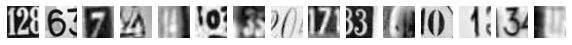

label for each of the above image: [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1]


In [39]:
# visualizing the first 15 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:15]))

In [40]:
import tensorflow as tf

trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [41]:
trainY[0:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model_nn = Sequential()

In [53]:
model_nn.add(Dense(1024, input_shape = (1024,), activation = 'relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.5))
model_nn.add(Dense(1024, activation = 'relu'))
model_nn.add(Dense(10, activation = 'softmax'))
sgd = optimizers.Adam(lr = 0.1)
model_nn.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model_nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total params: 2,113,546
Trainable params: 2,111,498
Non-trainable params: 2,048
_________________________________________________________________


In [50]:
model_nn.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 93us/step - loss: 14.2199 - acc: 0.1002 - val_loss: 14.4812 - val_acc: 0.1016
Epoch 2/100
42000/42000 [==============================] - 3s 60us/step - loss: 14.5170 - acc: 0.0993 - val_loss: 14.4812 - val_acc: 0.1016
Epoch 3/100
42000/42000 [==============================] - 3s 60us/step - loss: 14.5170 - acc: 0.0993 - val_loss: 14.4812 - val_acc: 0.1016
Epoch 4/100
42000/42000 [==============================] - 3s 60us/step - loss: 14.5170 - acc: 0.0993 - val_loss: 14.4812 - val_acc: 0.1016
Epoch 5/100
42000/42000 [==============================] - 3s 60us/step - loss: 14.5170 - acc: 0.0993 - val_loss: 14.4812 - val_acc: 0.1016
Epoch 6/100
42000/42000 [==============================] - 3s 60us/step - loss: 14.5170 - acc: 0.0993 - val_loss: 14.4812 - val_acc: 0.1016
Epoch 7/100
42000/42000 [==============================] - 3s 60us/step - loss: 14.5170 - acc: 0.0993 - val_lo

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model_nn2 = Sequential()
model_nn2.add(Dense(1024, input_shape = (1024,), activation= 'linear'))
model_nn2.add(BatchNormalization())
model_nn2.add(Dropout(0.5))
model_nn2.add(Dense(1024, activation = 'linear'))
model_nn2.add(Dropout(0.5))
model_nn2.add(Dense(10, activation = 'softmax'))
sgd = optimizers.Adam(lr = 0.3)
model_nn2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model_nn2.summary()
model_nn2.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 100, verbose = 1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                10250     
Total params: 2,113,546
Trainable params: 2,111,498
Non-trainable params: 2,048
________________________________________

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model_nn3 = Sequential()
model_nn3.add(Dense(1024, input_shape = (1024,), activation = 'tanh'))
model_nn3.add(BatchNormalization())
model_nn3.add(Dropout(0.5))
model_nn3.add(Dense(1024, activation = 'tanh'))
model_nn3.add(Dropout(0.5))
model_nn3.add(Dense(10, activation = 'tanh'))
sgd = optimizers.Adam(lr = 0.3)
model_nn3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model_nn3.summary()
model_nn3.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 100, verbose = 1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_7 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                10250     
Total params: 2,113,546
Trainable params: 2,111,498
Non-trainable params: 2,048
________________________________________

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model_nn4 = Sequential()
model_nn4.add(Dense(1024, input_shape = (1024,), activation = 'sigmoid'))
model_nn4.add(BatchNormalization())
model_nn4.add(Dropout(0.1))
model_nn4.add(Dense(1024, activation = 'sigmoid'))
model_nn4.add(Dropout(0.1))
model_nn4.add(Dense(10, activation = 'softmax'))
sgd = optimizers.Adam(lr = 0.01)
model_nn4.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model_nn4.summary()
model_nn4.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 100, verbose = 1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_8 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                10250     
Total params: 2,113,546
Trainable params: 2,111,498
Non-trainable params: 2,048
________________________________________

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model_nn5 = Sequential()
model_nn5.add(Dense(1024, input_shape = (1024,), activation = 'sigmoid'))
model_nn5.add(BatchNormalization())
model_nn5.add(Dropout(0.1))
model_nn5.add(Dense(1024, activation = 'relu'))
model_nn5.add(Dropout(0.1))
model_nn5.add(Dense(10, activation = 'softmax'))
sgd = optimizers.Adam(lr = 0.001)
model_nn5.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model_nn5.summary()
model_nn5.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 100, verbose = 1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_9 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                10250     
Total params: 2,113,546
Trainable params: 2,111,498
Non-trainable params: 2,048
________________________________________

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
from keras.layers import LeakyReLU
model_nn6 = Sequential()
model_nn6.add(Dense(1024, input_shape = (1024,),kernel_initializer=initializers.he_normal(seed=5), bias_initializer=initializers.Ones()))
model_nn6.add(BatchNormalization())
model_nn6.add(LeakyReLU(alpha=0.01))
model_nn6.add(Dense(10, activation="softmax"))
sgd = optimizers.Adam(lr = 0.01)
model_nn6.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model_nn6.summary()
model_nn6.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 100, epochs = 100, verbose = 1)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_10 (Batc (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 129us/step - loss: 1.5545 - acc: 0.5283 - val_loss: 2.8721 - val_acc: 0.3572
Epoch 2/100
42000/42000 [=======================

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model_final = Sequential()
model_final.add(Dense(units = 1024, input_shape = (1024,), activation = 'relu'))
model_final.add(BatchNormalization())
model_final.add(Dropout(0.5))
model_final.add(Dense(units = 1024, activation = 'relu'))
model_final.add(Dense(units = 10, activation = 'softmax'))
sgd = optimizers.SGD(lr = 0.1, momentum=0.9, nesterov=True)
model_final.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model_final.summary()
model_final.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 100, epochs = 100, verbose = 1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_13 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_38 (Dense)             (None, 10)                10250     
Total params: 2,113,546
Trainable params: 2,111,498
Non-trainable params: 2,048
_________________________________________________________________
Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================

# Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

# Implement batch normalization for training the neural network (2.5 points)

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model_final1 = Sequential()
model_final1.add(Dense(units = 1024, input_shape = (1024,), activation = 'relu'))
model_final1.add(BatchNormalization())
model_final1.add(Dropout(0.5))
model_final1.add(Dense(units = 1024, activation = 'relu'))
model_final1.add(Dropout(0.4))
model_final1.add(Dense(units = 1024, activation = 'relu'))
model_final1.add(Dropout(0.3))
model_final1.add(Dense(units = 1024, activation = 'relu'))
model_final1.add(Dropout(0.2))
model_final1.add(Dense(units = 1024, activation = 'relu'))
model_final1.add(Dropout(0.1))
model_final1.add(Dense(units = 1024, activation = 'relu'))
model_final1.add(Dropout(0.05))
model_final1.add(Dense(units = 10, activation = 'softmax'))
model_final1.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
model_final1.summary()
model_final1.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 2000, epochs = 1000, verbose = 1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_15 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_23 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_24 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_25 (Dropout)         (None, 1024)            

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
from keras.layers import Conv2D, MaxPooling2D
model_final2 = Sequential()
model_final2.add(Dense(units = 1024, input_shape = (1024,), activation = 'relu', kernel_initializer=initializers.he_normal(seed=10), bias_initializer=initializers.Zeros()))
model_final2.add(BatchNormalization())
model_final2.add(Dropout(0.1))
model_final2.add(Dense(units = 1024, activation = 'relu'))
model_final2.add(Dropout(0.1))
model_final2.add(Dense(units = 1024, activation = 'relu'))
model_final2.add(Dropout(0.1))
model_final2.add(Dense(units = 10, activation = 'softmax'))
sgd = optimizers.Adam(lr = 0.01)
model_final2.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
model_final2.summary()
model_final2.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 100, epochs = 200, verbose = 1)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_22 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_47 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_78 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_48 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_79 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_49 (Dropout)         (None, 1024)            

In [84]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
model_final3 = Sequential()
model_final3.add(Dense(units = 1024, input_shape = (1024,), activation = 'relu', kernel_initializer=initializers.he_normal(seed=10), bias_initializer=initializers.Zeros()))
model_final3.add(BatchNormalization())
model_final3.add(LeakyReLU(alpha=0.01))
model_final3.add(Dropout(0.1))
model_final3.add(Dense(units = 1024, activation = 'relu'))
model_final3.add(Dropout(0.1))
model_final3.add(Dense(units = 1024, activation = 'relu'))
model_final3.add(Dropout(0.1))
model_final3.add(Dense(units = 10, activation = 'softmax'))
adam = optimizers.adam(lr=0.01)
model_final3.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model_final3.summary()
model_final3.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 100, verbose = 1)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_25 (Batc (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_90 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_57 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_91 (Dense)             (None, 1024)            

In [85]:
pred_nn_nC = model_final3.predict(X_test_flat)

import numpy as np
pred_nn_nonConv= np.argmax(pred_nn_nC, axis=1)

from sklearn import metrics
print("Non - Conv NeuNet Metrics = \n", metrics.classification_report(y_test, pred_nn_nonConv))

Non - Conv NeuNet Metrics = 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1814
           1       0.75      0.88      0.81      1828
           2       0.85      0.81      0.83      1803
           3       0.78      0.76      0.77      1719
           4       0.86      0.88      0.87      1812
           5       0.81      0.81      0.81      1768
           6       0.82      0.79      0.81      1832
           7       0.81      0.90      0.85      1808
           8       0.87      0.69      0.77      1812
           9       0.77      0.83      0.80      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



In [98]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense, Flatten

n_classes = 10

X_train_conv = X_train.reshape(42000,32,32,1)
X_test_conv = X_test.reshape(18000,32,32,1)
model_new = Sequential()
model_new.add(Conv2D(input_shape=(32,32,1), filters=32, 
                 use_bias=True, kernel_size=(3,3)))
model_new.add(Activation('relu'))
model_new.add(Dropout(0.1))
model_new.add(Conv2D(filters=64, use_bias=False, kernel_size=(5,5), strides=2))
model_new.add(Activation('relu'))
model_new.add(Dropout(0.2))
model_new.add(Flatten())
model_new.add(Dense(128))
model_new.add(BatchNormalization())
model_new.add(Activation('relu'))
model_new.add(Dropout(0.3))
model_new.add(Dense(n_classes, activation="softmax"))
model_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])
model_new.summary()
model_new.fit(X_train_conv, trainY, validation_data=(X_test_conv,testY), batch_size = 500, epochs = 50, verbose = 1)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
activation_19 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_77 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        51200     
_________________________________________________________________
activation_20 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_78 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 10816)           

In [0]:
predy_nn = model_new.predict(X_test_conv)

In [100]:
predy_nn.shape

(18000, 10)

In [102]:
y_test.shape

(18000,)

In [103]:

#reverse categorical to class
import numpy as np

pred_nn_class= np.argmax(predy_nn, axis=1)
pred_nn_class[0:10]

array([1, 7, 2, 9, 0, 9, 1, 8, 4, 4])

In [104]:
pred_y[0:10]

array([6, 7, 2, 9, 0, 9, 1, 5, 8, 4], dtype=uint8)

In [105]:

from sklearn import metrics
print("Conv NeuNet Metrics = \n", metrics.classification_report(y_test, pred_nn_class))

Conv NeuNet Metrics = 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      1814
           1       0.89      0.92      0.90      1828
           2       0.94      0.90      0.92      1803
           3       0.89      0.88      0.88      1719
           4       0.92      0.93      0.93      1812
           5       0.90      0.91      0.91      1768
           6       0.91      0.91      0.91      1832
           7       0.93      0.92      0.92      1808
           8       0.90      0.90      0.90      1812
           9       0.90      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



# Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

Traditional KNearestNeighbor method
1. Traditional KNN method have  limited number of parameters to tweak to improve accuracy
2. Maximum accuracy of 64 % achived.

KNN Metrics = 
               precision    recall  f1-score   support

           0       0.59      0.74      0.65      1814
           1       0.58      0.79      0.67      1828
           2       0.76      0.62      0.69      1803
           3       0.60      0.54      0.57      1719
           4       0.73      0.78      0.75      1812
           5       0.68      0.51      0.58      1768
           6       0.62      0.56      0.59      1832
           7       0.74      0.75      0.74      1808
           8       0.55      0.55      0.55      1812
           9       0.64      0.59      0.61      1804

    accuracy                           0.64     18000
   macro avg       0.65      0.64      0.64     18000
weighted avg       0.65      0.64      0.64     18000



Neural network
1. In Neural netwrok there are many hyper parameters which helps improving the accuracy
2. Added intermidiate layers with non-linear activation functions to improve the performace.
3. With Overall accuracy is 82%.


Non - Conv NeuNet Metrics = 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1814
           1       0.75      0.88      0.81      1828
           2       0.85      0.81      0.83      1803
           3       0.78      0.76      0.77      1719
           4       0.86      0.88      0.87      1812
           5       0.81      0.81      0.81      1768
           6       0.82      0.79      0.81      1832
           7       0.81      0.90      0.85      1808
           8       0.87      0.69      0.77      1812
           9       0.77      0.83      0.80      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000

1. Thru Convolutional NN 91% accuracy achieved.

Conv NeuNet Metrics = 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      1814
           1       0.89      0.92      0.90      1828
           2       0.94      0.90      0.92      1803
           3       0.89      0.88      0.88      1719
           4       0.92      0.93      0.93      1812
           5       0.90      0.91      0.91      1768
           6       0.91      0.91      0.91      1832
           7       0.93      0.92      0.92      1808
           8       0.90      0.90      0.90      1812
           9       0.90      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000